<a href="https://www.kaggle.com/code/mrafraim/dl-day-5-loss-functions?scriptVersionId=285346443" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Day 5: Loss Functions

Welcome to Day 5!  

### Today’s goals:
1. Understand what **loss functions** are and why they are critical  
2. Explore **Mean Squared Error (MSE)** and **Cross-Entropy Loss**  
3. Implement small examples in **NumPy**  
4. Visualize loss curves for intuition  

Loss functions quantify how far the network's prediction is from the true value.

---

# What is a Loss Function?

A loss function measures the error between predicted output $\hat{y}$ and true output $y$.  

- High loss → predictions are poor  
- Low loss → predictions are close to true values  

During training, the network tries to minimize the loss using backpropagation.  

Mathematically:

$$
Loss = f(\hat{y}, y)
$$


# Mean Squared Error (MSE)

Used mainly for **regression tasks**.  

For a single prediction:

$$
MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
$$

Where:
- $n$ = number of samples  
- $\hat{y}_i$ = predicted value  
- $y_i$ = true value  

> Squared term penalizes large errors more heavily.


# MSE Example (Code)

In [1]:
import numpy as np

# True values
y_true = np.array([1.0, 0.0, 1.0])

# Predictions
y_pred = np.array([0.9, 0.2, 0.8])

# MSE calculation
mse = np.mean((y_pred - y_true)**2)
mse


0.029999999999999995

# Cross-Entropy Loss

Used mainly for **classification tasks**, especially binary classification.  

For a single sample:

$$
L = - \left( y \cdot \log(\hat{y}) + (1 - y) \cdot \log(1 - \hat{y}) \right)
$$

**Intuition:**

* If $y=1$, only the first term matters: $$-\log(\hat{y})$$
  * If $\hat{y}$ is close to 1 → loss small  
  * If $\hat{y}$ is close to 0 → loss huge

* If $y=0$, only the second term matters: $$-\log(1-\hat{y})$$
  * If $\hat{y}$ is close to 0 → loss small  
  * If $\hat{y}$ is close to 1 → loss huge

This penalizes wrong confident predictions heavily.
Where:
- $y$ = true label (0 or 1)  
- $\hat{y}$ = predicted probability (0 to 1)  

For multiple samples:

$$
CrossEntropy = - \frac{1}{n} \sum_{i=1}^{n} \left( y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i) \right)
$$


# Cross-Entropy Example (Code)

In [2]:
# True labels
y_true = np.array([1, 0, 1])

# Predicted probabilities
y_pred = np.array([0.9, 0.2, 0.8])

# Avoid log(0)
epsilon = 1e-15
y_pred = np.clip(y_pred, epsilon, 1-epsilon) # Prevent log(0) errors by forcing predictions into a safe numeric range

# Binary cross-entropy
cross_entropy = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
cross_entropy


0.18388253942874858

# Visualizing Loss for Different Predictions

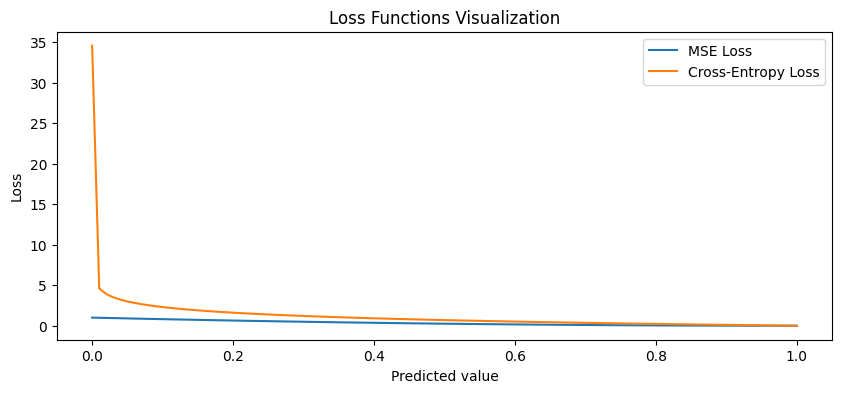

In [3]:
import matplotlib.pyplot as plt

y_true = 1
preds = np.linspace(0, 1, 100)

# MSE
mse_loss = (preds - y_true)**2

# Binary Cross-Entropy
cross_entropy_loss = -(y_true * np.log(preds + 1e-15) + (1 - y_true) * np.log(1 - preds + 1e-15))

plt.figure(figsize=(10,4))
plt.plot(preds, mse_loss, label='MSE Loss')
plt.plot(preds, cross_entropy_loss, label='Cross-Entropy Loss')
plt.xlabel("Predicted value")
plt.ylabel("Loss")
plt.title("Loss Functions Visualization")
plt.legend()
plt.grid(False)
plt.show()


The graph shows that Cross-Entropy punishes wrong predictions far more aggressively than MSE, giving strong gradients when the model is confidently wrong which is why it’s the right choice for classification. MSE is too gentle for classification but perfectly suited for regression, where outputs are continuous and don’t need probability-based penalties.

# Key Takeaways from Day 5

1. **Loss function** measures error between predicted and true output  
2. **MSE**: used for regression, penalizes large errors  
   $$MSE = \frac{1}{n} \sum (\hat{y} - y)^2$$  
3. **Cross-Entropy**: used for classification, penalizes wrong probabilities heavily  
   $$L = - (y \log(\hat{y}) + (1-y) \log(1-\hat{y}))$$  
4. Visualizing loss curves helps understand the effect of prediction errors  
5. Minimizing loss is the main goal of backpropagation and training

---

<p style="text-align:center; font-size:18px;">
© 2025 Mostafizur Rahman
</p>